In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

**Гипотеза компактности (для классификации)**:
Близкие объекты, как правило, лежат в одном классе.

**Гипотеза непрерывности (для регрессии)**: Близким
объектам соответствуют близкие ответы.

Метод k ближайших соседей (kNN — k nearest neighbours) метрический алгоритм для классификации объектов, основанный на оценивании сходства объектов.
Классифицируемый объект относится к тому классу, которому принадлежат ближайшие к нему объекты обучающей выборки.

Алгоритм:

1 Вычислить расстояние до каждого из объектов обучающей выборки

2 Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально

3 Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

**Достоинства:**
* Простота реализации.
* Классификацию, проведенную алгоритмом, легко интерпретировать путем предъявления пользователю нескольких ближайших объектов.

**Недостатки:**
* Необходимость хранения обучающей выборки целиком.
* Поиск ближайшего соседа предполагает сравнение классифицируемого объекта со всеми объектами выборки

**Выбор $k$**

Малые значения $k$ приведут к тому, что “шум” (выбросы) будет существенно влиять на результаты.

Большие значения усложняют вычисления и искажают логику ближайших соседей, в соответствии с которой ближайшие точки могут принадлежать
одному классу (гипотеза компактности).

Эвристика: $k=\sqrt n$

# Пример использования

In [2]:
url='https://drive.google.com/file/d/1fxO-zxmRcz7CTlN8o55ahqGttUfxRkiI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                 random_state=42, stratify=y)

In [22]:
param_grid = dict(n_neighbors=np.arange(1, 3 * int(np.ceil(np.sqrt(len(X_train[0]))))))
print(param_grid)

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])}


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             scoring='accuracy')

In [25]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.69460784 0.71368778 0.67899698 0.7061086  0.69826546 0.70987934
 0.71772247 0.70422323]


Text(0, 0.5, 'Cross-Validated Accuracy')

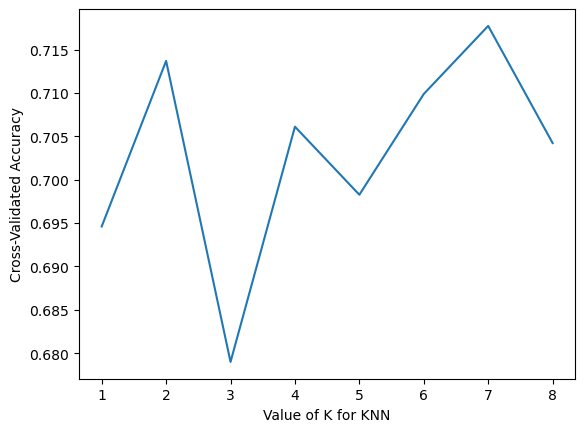

In [10]:
plt.plot(param_grid['n_neighbors'], grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [11]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7177224736048264
{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


In [18]:
metrics = ['cityblock', 'cosine', 'euclidean']

In [13]:
param_grid = dict(n_neighbors=np.arange(1, 3 * int(np.ceil(np.sqrt(len(X_train[0]))))))
print(param_grid)

{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])}


[0.69057315 0.7        0.68457768 0.69819005 0.69841629 0.70980392
 0.70803167 0.71772247]


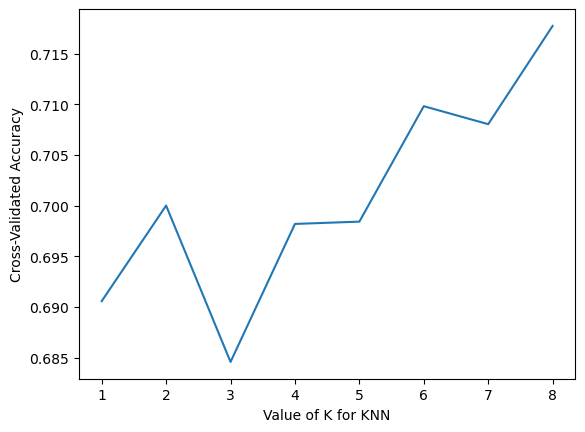

[0.60886124 0.67303922 0.69076169 0.67884615 0.68865008 0.69630468
 0.69830317 0.70226244]


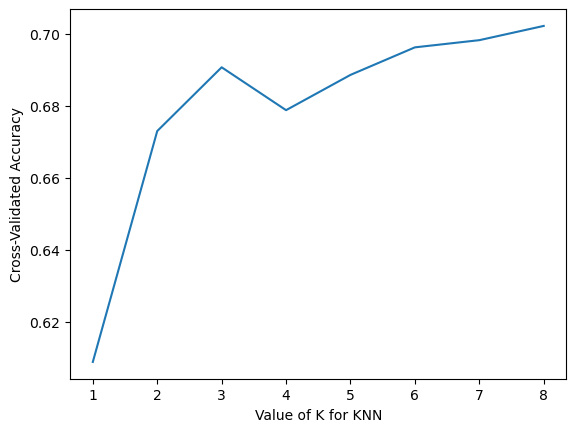

[0.69460784 0.71368778 0.67899698 0.7061086  0.69826546 0.70987934
 0.71772247 0.70422323]


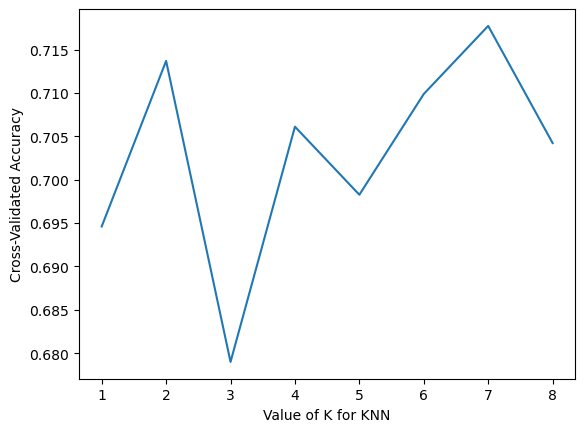

In [20]:
for i in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=i)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
    grid.fit(X_train, y_train)
    grid_mean_scores = grid.cv_results_['mean_test_score']
    print(grid_mean_scores)
    plt.plot(param_grid['n_neighbors'], grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

# Задание
Реализовать самостоятельно метод классификации kNN, где использовалась бы метрика Евклидового расстояния, $k=2$.

In [28]:
model = knn.fit(X_train, y_train)

In [29]:
y_prd = model.predict(X_test)

In [31]:
y_tst = np.zeros(254)

accuracy_score(y_tst, y_prd)

0.7086614173228346

In [32]:
y_prd

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [36]:
knn_hw = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
grid_hw = GridSearchCV(knn_hw, param_grid, cv=11, scoring='accuracy', return_train_score=False)
grid_hw.fit(X_train, y_train)

GridSearchCV(cv=11,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=2),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])},
             scoring='accuracy')

In [37]:
model_hw = knn_hw.fit(X_train, y_train)

In [38]:
model_hw

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [39]:
predictions = model_hw.predict(X_test)

In [40]:
accuracy_score(predictions, y_test)

0.7086614173228346

In [41]:
y_nulls = np.zeros(254)

In [42]:
accuracy_score(predictions, y_nulls)

0.7992125984251969

In [43]:
accuracy_score(y_test, y_nulls)

0.6496062992125984

In [44]:
comparasion_table = pd.DataFrame({'pred':pd.Series(predictions), 'test':pd.Series(y_test)})
comparasion_table

,pred,test
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
249,0,0
250,0,0
251,0,1
252,0,0


In [45]:
comparasion_table.query('pred != test')

,pred,test
1,0,1
8,0,1
13,0,1
14,0,1
15,0,1
...,...,...
238,0,1
241,1,0
247,1,0
251,0,1


<strong>Дальше идёт проверка с другими параметрами</strong>

In [46]:
knn_hw = KNeighborsClassifier(n_neighbors=6, metric='cityblock')
grid_hw = GridSearchCV(knn_hw, param_grid, cv=13, scoring='accuracy', return_train_score=False)
grid_hw.fit(X_train, y_train)
model_hw = knn_hw.fit(X_train, y_train)
predictions = model_hw.predict(X_test)
print(accuracy_score(predictions, y_test))
comparasion_table = pd.DataFrame({'pred':pd.Series(predictions), 'test':pd.Series(y_test)})
comparasion_table.query('pred != test')

0.7165354330708661


,pred,test
1,0,1
8,0,1
13,0,1
14,0,1
15,0,1
...,...,...
230,1,0
234,0,1
238,0,1
251,0,1
